##### Set Up

In [1]:
## imports and dependencies 

# standard libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.neighbors import KNeighborsRegressor

# data split
from sklearn.model_selection import train_test_split

# scaling 
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error

##### Data

In [2]:
df = pd.read_csv("region_dataset.csv")

In [3]:
df = df.drop(['Name', 'Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ', 'Gen Pos_D', 'Gen Pos_M', 'Gen Pos_F'], axis=1)

##### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9)  
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

##### Models

In [9]:
lst = []

for i in range(1, int(len(df)**(1/2))):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train_scaled, y_train)

    y_pred = model.predict(x_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)

    lst.append(mae)

    print("K used", i)
    print("Mean Absolute Error:", mae)
    print("")

K used 1
Mean Absolute Error: 0.688092079871554

K used 2
Mean Absolute Error: 0.6432938281403413

K used 3
Mean Absolute Error: 0.6164544940942718

K used 4
Mean Absolute Error: 0.6046005657624495

K used 5
Mean Absolute Error: 0.5850739788290676

K used 6
Mean Absolute Error: 0.5903816303646775

K used 7
Mean Absolute Error: 0.5838117189588613

K used 8
Mean Absolute Error: 0.5812602985195897

K used 9
Mean Absolute Error: 0.5822296463501002

K used 10
Mean Absolute Error: 0.5799354094990045

K used 11
Mean Absolute Error: 0.5807360396367478

K used 12
Mean Absolute Error: 0.5829102155454113

K used 13
Mean Absolute Error: 0.5815350193281207

K used 14
Mean Absolute Error: 0.5795194890464365

K used 15
Mean Absolute Error: 0.5771769143937024

K used 16
Mean Absolute Error: 0.5737315992451537

K used 17
Mean Absolute Error: 0.573119286059839

K used 18
Mean Absolute Error: 0.5761551725884915

K used 19
Mean Absolute Error: 0.5753796125145046

K used 20
Mean Absolute Error: 0.575324329

In [10]:
# KNN Scaled
KNN_scaled = KNeighborsRegressor(n_neighbors=lst.index(min(lst))+1)
KNN_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = KNN_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (scaled):", mae_scaled)

Mean Absolute Error (scaled): 0.5729206639361797


In [11]:
# KNN PCA
KNN_pca = KNeighborsRegressor(n_neighbors=lst.index(min(lst))+1)
KNN_pca.fit(x_train_pca, y_train)
y_pred_pca = KNN_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.5835304587461164


In [ ]:
# model
lst = []

for i in range(1, int(len(df)**(1/2))):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train_scaled, y_train)

    y_pred = model.predict(x_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)

    lst.append(mae)

    print("K used", i)
    print("Mean Absolute Error:", mae)
    print("")

K used 1
Mean Absolute Error: 0.688092079871554

K used 2
Mean Absolute Error: 0.6432938281403413

K used 3
Mean Absolute Error: 0.6164544940942718

K used 4
Mean Absolute Error: 0.6046005657624495

K used 5
Mean Absolute Error: 0.5850739788290676

K used 6
Mean Absolute Error: 0.5903816303646775

K used 7
Mean Absolute Error: 0.5838117189588613

K used 8
Mean Absolute Error: 0.5812602985195897

K used 9
Mean Absolute Error: 0.5822296463501002

K used 10
Mean Absolute Error: 0.5799354094990045

K used 11
Mean Absolute Error: 0.5807360396367478

K used 12
Mean Absolute Error: 0.5829102155454113

K used 13
Mean Absolute Error: 0.5815350193281207

K used 14
Mean Absolute Error: 0.5795194890464365

K used 15
Mean Absolute Error: 0.5771769143937024

K used 16
Mean Absolute Error: 0.5737315992451537

K used 17
Mean Absolute Error: 0.573119286059839

K used 18
Mean Absolute Error: 0.5761551725884915

K used 19
Mean Absolute Error: 0.5753796125145046

K used 20
Mean Absolute Error: 0.575324329

In [ ]:
lst.index(min(lst))

25

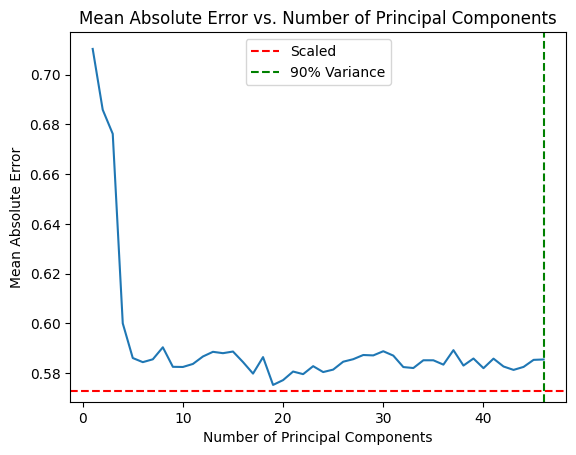

In [12]:
# iterate through numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    KNN = KNeighborsRegressor(n_neighbors=lst.index(min(lst))+1)
    KNN.fit(x_train_pca, y_train)
    y_pred = KNN.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [13]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(19, 0.5752198313127329)

In [ ]:
mae_values

[29656.44566170026,
 28375.336985100785,
 27280.318141980715,
 21900.92506573181,
 21607.85407537248,
 22632.326029798423,
 21791.38913234005,
 21766.204645048205,
 22428.194127957933,
 22322.68492550394,
 22091.265994741454,
 21954.689307624893,
 21623.820333041192,
 21524.24189307625,
 20963.53943908852,
 20775.474145486412,
 20324.148992112183,
 20153.055214723925,
 19955.013584574932,
 19574.084136722176,
 19126.517090271693,
 19011.01183172656,
 19357.13584574934,
 19259.727870289218,
 19580.85977212971,
 19536.653812445224,
 19283.165205959685,
 19350.584136722173,
 19252.223926380368,
 19423.127519719543,
 19393.302804557406,
 19296.875547765118,
 19428.898334794038]